# 3 Implementierung Co-Group-Join (5 Punkte)

Copyright Jens Dittrich & Marcel Maltry, [Big Data Analytics Group](https://bigdata.uni-saarland.de/), [CC-BY-SA](https://creativecommons.org/licenses/by-sa/4.0/legalcode)


In [1]:
from os import listdir
from graphviz import Source

from ra.relation import Relation
from ra.operators_log import *
from ra.operators_phys import *
from ra.utils import load_csv

In the following, you should implement the Equi-Join operator in two steps:
1. Complete the implementation of the class `Equi_Join`. This class extends `BinaryOperator` and represents the logical operator equi-join. In particular, the logical operator cannot be evaluated.
2. Complete the implementation of the class `Co_Group_Join`. This class extends `Equi_Join` and adds evaluation functionality, i.e. it is a cogroup-based implemention of a physical operator.

Submit both the cell containing `class Equi_Join` and the cell containing `class Co_Group_Join` in a text document.


## `Equi_Join`

Complete the following method:
* `get_schema()`: Returns the schema of the operator based on its childrens' schemas. Here you have to return the concatenation of the left and right schema.

In [2]:
# Exercise
# Submit this code cell!
class Equi_Join(BinaryOperator):
    """The equi join

    Attributes:
        l_input   (:obj: `Operator`): The left input to the equi-join operator.
        r_input   (:obj: `Operator`): The right input to the equi-join operator.
        l_attrs:  (:obj: `String`): A comma-separated list of left attributes that should be equal.
        r_attrs:  (:obj: `String`): A comma-separated list of right attributes that should be equal. 
    """
    def __init__(self, l_input, r_input, l_attrs, r_attrs):
        # call super constructor, stores child operators
        super().__init__(l_input, r_input) 
        self.l_attrs = str_to_list(l_attrs)
        self.r_attrs = str_to_list(r_attrs)
        # set color and style node for dot graphs
        self.set_dot_attrs({'color':'#FFFC79', 'style': 'filled'})

    def __str__(self):
        """Returns a string representation of the operator tree rooted in this operator."""
        return f'({self.l_input}) ⨝_{{[{", ".join(self.l_attrs)}]}},{{[{", ".join(self.r_attrs)}]}} ({self.r_input})'

    def get_schema(self):
        """Returns the schema of the operator based on its childrens' schemas."""
        l_child_schema = self.l_input.get_schema()
        r_child_schema = self.r_input.get_schema()

        # integrity check (equally named attributes are not allowed here)
        l_attributes = [a for a, _ in l_child_schema]
        r_attributes = [a for a, _ in r_child_schema]
        assert len(set(l_attributes) & set(r_attributes)) == 0

        # Add your code here!
        # ...
        # Return the equi-joins schema.
        pass

    def _dot(self, graph, prefix, caption='⨝_{{[{}]}},{{[{}]}}'):
        """Adds a node for the operator into the graph and returns the node's name."""
        # Define unique name within the graph
        node_name = prefix + 'Equi_Join'
        # The caption is the label already
        node_label = caption.format(', '.join(self.l_attrs), ', '.join(self.r_attrs))
        # Call `_dot_helper` to insert new node into graph
        self._dot_helper(graph, prefix, node_name, node_label)
        # Return node's name
        return node_name

### Schema and Graph check

Next, we call the methods that you just implemented. Consider the comments to see whether your implementation produces the expected results.

In [3]:
foo = Relation('foo', [('fid', int), ('name', str), ('cid', int), ('color', str)])
rel_foo = LeafRelation(foo)

bar = Relation('bar', [('bid', int), ('shape', str)])
rel_bar = LeafRelation(bar)

foo_bar = Equi_Join(rel_foo, rel_bar, 'fid', 'bid')
print(foo_bar)

(foo) ⨝_{[fid]},{[bid]} (bar)


In [4]:
schema = foo_bar.get_schema()
# This should print the operator's schema:
# [('fid', <class 'int'>), ('name', <class 'str'>), ('cid', <class 'int'>), ('color', <class 'str'>), 
# ('bid', <class 'int'>), ('shape', <class 'str'>)]
print(schema if schema is not None else "TODO: Implement get_schema().")

TODO: Implement get_schema().


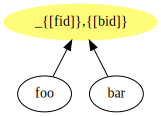

In [5]:
graph = foo_bar.get_graph()
graph

## `Co_Group_Join`

Implement the following method:
* `evaluate()`: Returns a relation object containing the operators results. Make sure that your implementation is in O(n) where n is the number of result tuples of `l_input` and `r_input`. This runtime requirement only holds if the join is done over the key attributes of both input relations. Your implementation still has to cover all cases. 

**Implementation Steps**:
1. Recursively compute the resulting relations of the left and the right input.
2. Create a new Relation for the result tuples.
3. Construct the Co-Groups.
4. Calculate the resulting join by computing the cross product for each for the partition tuples.

**Hints**: 
- You can create a new Relation by calling `Relation(name, schema)`
- In order to receive the list of tuples that are in a Relation `R`, you can call `R.tuples`
- You can add a tuple `x` to a relation `R` by calling `R.add_tuple(x)`
- If needed, you can also inspect the implementations of other operators in 'ra.operators_phys'.

In [6]:
# Exercise
# Submit this code cell!
class Co_Group_Join(Equi_Join):
    def _dot(self, graph, prefix):
        """Adds a node for the operator into the graph and returns the node's name."""
        return super()._dot(graph, prefix, "⨝_CoGroupBased{{[{}]}},{{[{}]}}")
    
    def __str__(self):
        """Returns a string representation of the operator tree rooted in this operator."""
        return f'({self.l_input}) ⨝_CoGroupBased{{[{", ".join(self.l_attrs)}]}},{{[{", ".join(self.r_attrs)}]}} ({self.r_input})'
    
    def evaluate(self):
        """Returns a relation object containing the operators results."""
        # Add your code here!
        # ...
        # Compute the operator's results. Do not use any other operators as subroutines (except cross product)!
        # Make sure that your implementation is in O(n) where n is the number of result
        # tuples of l_input and r_input (assuming a join over the key attributes of both input relations).
        pass

### Check schema and graph

Next, we call the methods that you just implemented. Consider the comments to see whether your implementation produces the expected results.

In [7]:
foo_bar = Co_Group_Join(rel_foo, rel_bar, "fid", "bid")
print(foo_bar)

(foo) ⨝_CoGroupBased{[fid]},{[bid]} (bar)


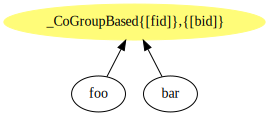

In [8]:
graph = foo_bar.get_graph()
# This should display the operator tree. The tree looks similar to the one above except that the label should
# contain "CoGroupBased".
graph

## Testing

Finally, the unit test below helps you test whether your implementation of `evaluate()` works on some small examples. Note that this unit test only checks functional correctness. In particular, it does not check whether your implementation of `evaluate()` performs evaluation in O(n).

In [9]:
import unittest

class EquiJoinTest(unittest.TestCase):
    
    def test_evaluate(self):
        # set up two relations to join
        foo = Relation('foo', [('fid', int), ('name', str), ('bar_id', int)])
        foo.add_tuple( (1, 'first',  3) )
        foo.add_tuple( (2, 'second', 2) )
        foo.add_tuple( (3, 'third',  1) )
        foo.add_tuple( (4, 'fourth', 1) )
        rel_foo = LeafRelation(foo)
        
        bar = Relation('bar', [('bid', int), ('string', str), ('attr', int)])
        bar.add_tuple( (1, 'fourth',  42) )
        bar.add_tuple( (2, 'second',  99) )
        bar.add_tuple( (3, 'first',    0) )
        rel_bar = LeafRelation(bar)
        
        # join name=string
        with self.subTest(msg='name=string'):
            l_attrs='name'
            r_attrs='string'
            eq = Co_Group_Join(rel_foo, rel_bar, l_attrs, r_attrs)
            res = eq.evaluate()
            
            self.assertEqual(len(res), 3)  # result contains 2tuples
            self.assertEqual(len(list(res.tuples)[0]), 6)  # result tuples have 6 attributes
            self.assertTrue((2, 'second', 2, 2, 'second', 99) in res.tuples)
            self.assertTrue((1, 'first',  3, 3, 'first',   0) in res.tuples)
            self.assertTrue((4, 'fourth', 1, 1, 'fourth', 42) in res.tuples)
            
        # join bar_id=bid
        with self.subTest(msg='bar_id=bid'):
            l_attrs='bar_id'
            r_attrs='bid'
            eq = Co_Group_Join(rel_foo, rel_bar, l_attrs, r_attrs)
            res = eq.evaluate()
        
            self.assertEqual(len(res), 4)  # result contains 4 tuples
            self.assertEqual(len(list(res.tuples)[0]), 6)  # result tuples have 6 attributes
            self.assertTrue((1, 'first',  3, 3, 'first',   0) in res.tuples)
            self.assertTrue((2, 'second', 2, 2, 'second', 99) in res.tuples)
            self.assertTrue((3, 'third',  1, 1, 'fourth', 42) in res.tuples)
            self.assertTrue((4, 'fourth', 1, 1, 'fourth', 42) in res.tuples)
        
        # join bar_id=bid and name=string
        with self.subTest(msg='bar_id=bid and name=string'):
            l_attrs='bar_id, name'
            r_attrs='bid, string'
            eq = Co_Group_Join(rel_foo, rel_bar, l_attrs, r_attrs)
            res = eq.evaluate()
            
            self.assertEqual(len(res), 3)  # result contains 2tuples
            self.assertEqual(len(list(res.tuples)[0]), 6)  # result tuples have 6 attributes
            self.assertTrue((1, 'first',  3, 3, 'first',   0) in res.tuples)
            self.assertTrue((2, 'second', 2, 2, 'second', 99) in res.tuples)
            self.assertTrue((4, 'fourth', 1, 1, 'fourth', 42) in res.tuples)

In [10]:
# Run the unit test without shutting down the jupyter kernel
unittest.main(argv=['ignored', '-v'], verbosity=2, exit=False)

test_evaluate (__main__.EquiJoinTest) ... 
ERROR: test_evaluate (__main__.EquiJoinTest) [name=string]
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_1507/4095077010.py", line 27, in test_evaluate
    self.assertEqual(len(res), 3)  # result contains 2tuples
TypeError: object of type 'NoneType' has no len()

ERROR: test_evaluate (__main__.EquiJoinTest) [bar_id=bid]
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_1507/4095077010.py", line 40, in test_evaluate
    self.assertEqual(len(res), 4)  # result contains 4 tuples
TypeError: object of type 'NoneType' has no len()

ERROR: test_evaluate (__main__.EquiJoinTest) [bar_id=bid and name=string]
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_1507/4095077010.py", line 54, in test_evaluate
    self.asse